## Minimum Variance Portfolio with the Risk-free Asset
---

Suppose there exists an asset on which the inernal rate of return is constant under any circumstances (<font color=red>risk-free asset</font>) and let $R_f$ denote the return on the risk-free asset (<font color=red>risk-free rate</font>).

The minimum variance portfolio problem with the risk-free asset but without the short-selling constraint is formulated as

$$
\begin{split}
 \min_{w}\quad & \sigma_P^2=w^{\intercal}\Sigma w, \\
 \text{subject to}\quad & (1 - w^{\intercal}\iota)R_f + w^{\intercal}\mu = \mu_P.
\end{split}
$$

In [1]:
%matplotlib inline
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt

In [2]:
Mu = np.array([1.0, 3.0, 1.5, 6.0, 4.5])
Stdev = np.array([5.0, 10.0, 7.5, 15.0, 11.0])
CorrMatrix = np.array([[1.00, 0.25, 0.18, 0.10, 0.25],
                       [0.25, 1.00, 0.36, 0.20, 0.20],
                       [0.18, 0.36, 1.00, 0.25, 0.36],
                       [0.10, 0.20, 0.25, 1.00, 0.45],
                       [0.25, 0.20, 0.36, 0.45, 1.00]])
Sigma = np.diag(Stdev) @ CorrMatrix @ np.diag(Stdev)
iota = np.ones(Mu.shape)
inv_Sigma = la.inv(Sigma)
A = Mu @ inv_Sigma @ iota
B = Mu @ inv_Sigma @ Mu
C = iota @ inv_Sigma @ iota
D = B * C - A ** 2

The solution of the minimum variance portfolio problem is 

$$
 w = \frac{\mu_P-R_f}{CR_f^2 - 2AR_f+B}\Sigma^{-1}(\mu_P - R_f\;\iota),
$$

where

$$
 A =\mu^{\intercal}\Sigma^{-1}\iota,\ B=\mu^{\intercal}\Sigma^{-1}\mu,\ 
 C =\iota^{\intercal}\Sigma^{-1}\iota,\ D = B C - A^2.
$$

The relationship between $\mu_P$ and $\sigma_P$ is given by

$$
 \mu_P = \begin{cases}
 R_f + \sigma_P\sqrt{CR_f^2 - 2AR_f+B}, & \mu_P > R_f; \\
 R_f - \sigma_P\sqrt{CR_f^2 - 2AR_f+B}, & \mu_P < R_f,
 \end{cases}
$$

which is also called the <font color=red>minimum variance frontier</font>.


In [3]:
R_f = 0.0
sigma_p2 = np.linspace(0, 1.2*np.sqrt(np.max(np.diagonal(Sigma))), num=250)
mu_p_riskless1 = R_f + np.sqrt(C * R_f ** 2 - 2.0 * A * R_f + B) * sigma_p2
mu_p_riskless2 = R_f - np.sqrt(C * R_f ** 2 - 2.0 * A * R_f + B) * sigma_p2

For camparison, we compute the minimum varaince frontier without the risk-free asset in the following cell.

$$
\mu_P = \begin{cases}
\displaystyle
\frac{A + \sqrt{D(C\sigma_P^2 - 1)}}{C}, & \mu_P > \frac{A}{C}; \\
& \\
\displaystyle
\frac{A - \sqrt{D(C\sigma_P^2 - 1)}}{C}, & \mu_P < \frac{A}{C}.
\end{cases}
$$

In [4]:
sigma_gmv = 1.0 / np.sqrt(C)
sigma_p = np.linspace(sigma_gmv, 1.2*np.sqrt(np.max(np.diagonal(Sigma))), num=250)
mu_p_efficient = (A + np.sqrt(np.abs(C * sigma_p ** 2 - 1.0) * D)) / C
mu_p_nonefficient = (A - np.sqrt(np.abs(C * sigma_p ** 2 - 1.0) * D)) / C

This cell creates the figure showing the minimum variance frontiers with and without the risk-free asset.

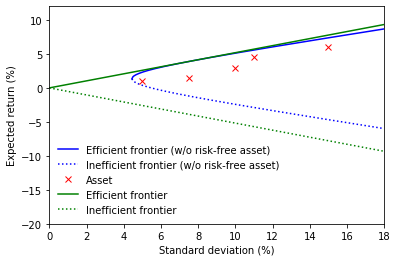

In [5]:
fig1 = plt.figure(1, facecolor='w')
plt.plot(sigma_p, mu_p_efficient, 'b-', label='Efficient frontier (w/o risk-free asset)')
plt.plot(sigma_p, mu_p_nonefficient, 'b:', label='Inefficient frontier (w/o risk-free asset)')
plt.plot(np.sqrt(np.diagonal(Sigma)), Mu, 'rx', label='Asset')
plt.plot(sigma_p2, mu_p_riskless1, 'g-', label='Efficient frontier')
plt.plot(sigma_p2, mu_p_riskless2, 'g:', label='Inefficient frontier')
plt.legend(loc='best',  frameon=False)
plt.xlabel('Standard deviation (%)')
plt.ylabel('Expected return (%)')
plt.xlim(0, sigma_p.max())
plt.ylim(-20, 12)
plt.show()